## Goal is for the Prediction of Rent
## Data understanding and visualizations 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
Data = pd.read_csv("../input/house-rent-prediction-dataset/House_Rent_Dataset.csv")
Data= Data.dropna()
Data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


Text(0, 0.5, 'Frequency')

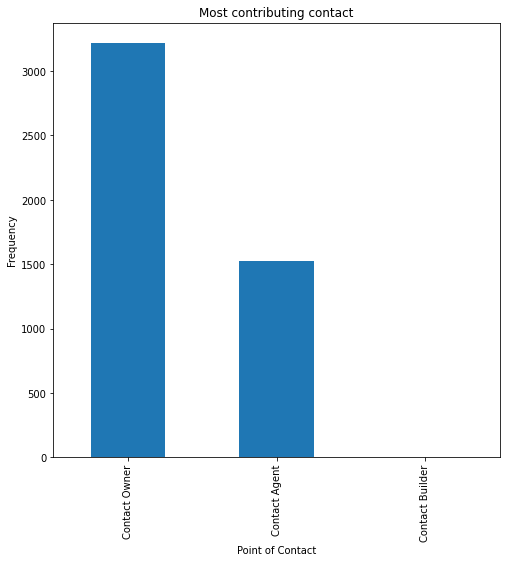

In [3]:
ax = Data['Point of Contact'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Most contributing contact")
ax.set_xlabel("Point of Contact")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

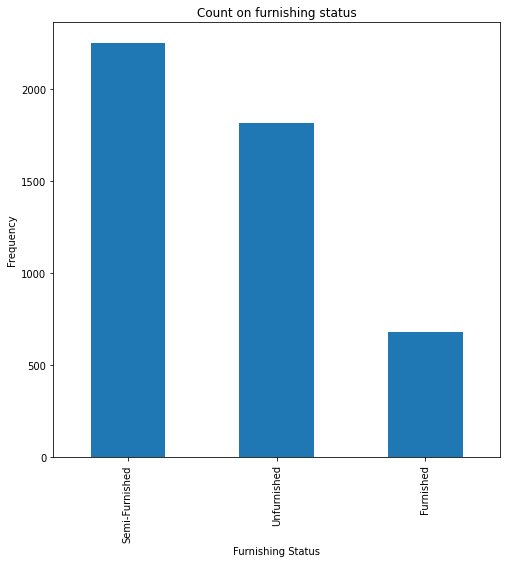

In [4]:
ax = Data['Furnishing Status'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Count on furnishing status")
ax.set_xlabel("Furnishing Status")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

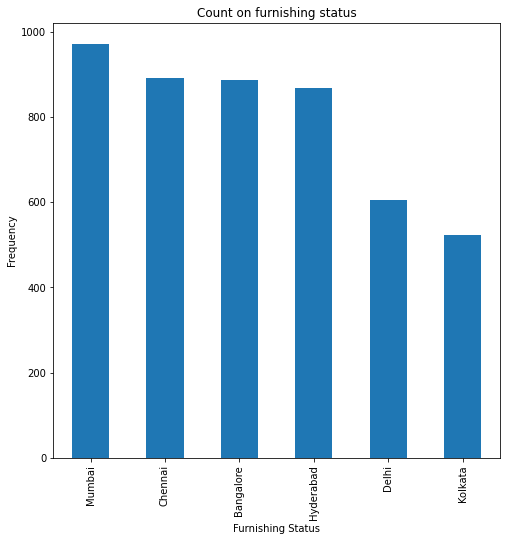

In [5]:
ax = Data['City'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Count on furnishing status")
ax.set_xlabel("Furnishing Status")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

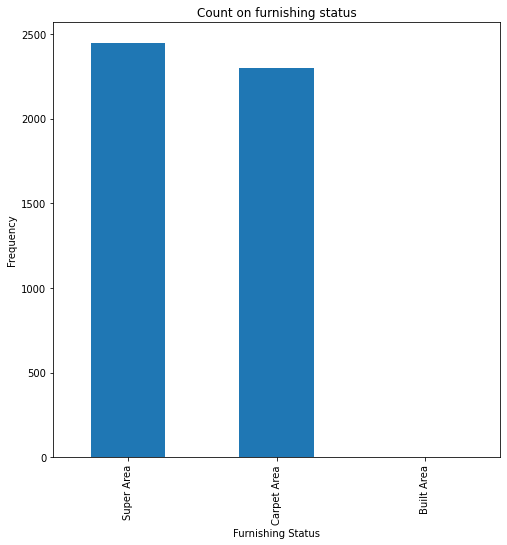

In [6]:
ax = Data['Area Type'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Count on furnishing status")
ax.set_xlabel("Furnishing Status")
ax.set_ylabel("Frequency")

In [7]:
#reference 
x=Data['Furnishing Status']
print(x)


0          Unfurnished
1       Semi-Furnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
4741    Semi-Furnished
4742    Semi-Furnished
4743    Semi-Furnished
4744    Semi-Furnished
4745       Unfurnished
Name: Furnishing Status, Length: 4746, dtype: object


> **Converting qualitative data to quantitive data**

In [8]:
Data.sort_values(by=['Rent'], inplace=True)
Data['Area Type'] = Data['Area Type'].replace('Carpet Area',1)
Data['Area Type'] = Data['Area Type'].replace('Super Area',2)
Data['Area Type']=Data['Area Type'].replace('Built Area',3)
Data['City'] = Data['City'].replace('Kolkata',1)
Data['City'] = Data['City'].replace('Delhi',2)
Data['City'] = Data['City'].replace('Mumbai',3)
Data['City'] = Data['City'].replace('Bangalore',4)
Data['City'] = Data['City'].replace('Hyderabad',5)
Data['City'] = Data['City'].replace('Chennai',6)

Data['Furnishing Status'] = Data['Furnishing Status'].replace('Unfurnished',1)
Data['Furnishing Status'] = Data['Furnishing Status'].replace('Semi-Furnished',2)
Data['Furnishing Status'] = Data['Furnishing Status'].replace('Furnished',3)

Data['Point of Contact'] = Data['Point of Contact'].replace('Contact Owner',1)
Data['Point of Contact'] = Data['Point of Contact'].replace('Contact Agent',2)
Data['Point of Contact'] = Data['Point of Contact'].replace('Contact Builder',3)
Data.drop(Data.columns[[0, 4, 6,9]], axis=1, inplace=True)
Data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact
4076,3,1200,2100,1,5,3,3,1
285,1,1500,200,2,1,2,1,1
471,1,1800,500,2,1,2,1,1
2475,2,2000,60,2,2,1,1,1
146,2,2200,550,2,1,3,1,1
...,...,...,...,...,...,...,...,...
1459,4,700000,3200,1,3,3,4,2
1329,4,850000,3200,1,3,3,4,2
827,4,1000000,3064,1,3,2,4,2
1001,4,1200000,5000,1,3,2,4,2


In [9]:
y = Data.iloc[:, -7].values
y

array([   1200,    1500,    1800, ..., 1000000, 1200000, 3500000])

**Taking rent as the test our objective for prediction **

In [10]:
x = Data.drop(['Rent'], axis=1)
x

,BHK,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact
4076,3,2100,1,5,3,3,1
285,1,200,2,1,2,1,1
471,1,500,2,1,2,1,1
2475,2,60,2,2,1,1,1
146,2,550,2,1,3,1,1
...,...,...,...,...,...,...,...
1459,4,3200,1,3,3,4,2
1329,4,3200,1,3,3,4,2
827,4,3064,1,3,2,4,2
1001,4,5000,1,3,2,4,2


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

## Decision Tree approach

In [12]:
from sklearn.tree import DecisionTreeRegressor 
modelDT = DecisionTreeRegressor(random_state = 1) 
modelDT.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [13]:
modelDT.score(x_test, y_test)

0.6608149208050331

In [14]:
y_pred = modelDT.predict(x_test)
pd.DataFrame(data={'Prediction of rent': y_pred.round(), 'Actual Rent': y_test})

,Prediction of rent,Actual Rent
0,10000.0,10500
1,50000.0,80000
2,120000.0,120000
3,25000.0,17000
4,23750.0,45000
...,...,...
707,85000.0,65000
708,13000.0,11000
709,13000.0,11000
710,6800.0,8000


## Random Forest approach

In [15]:
from sklearn.ensemble import RandomForestRegressor

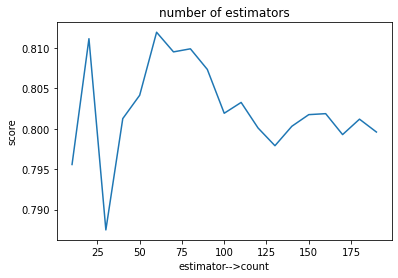

In [16]:
modelRF = RandomForestRegressor(random_state = 1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    modelRF.set_params(n_estimators=n)
    modelRF.fit(x_train, y_train)
    scores.append(modelRF.score(x_test, y_test))
plt.title("number of estimators")
plt.xlabel("estimator-->count")
plt.ylabel("score")
plt.plot(estimators, scores)

In [17]:
y_pred = modelRF.predict(x_test)
pd.DataFrame(data={'Prediction of rent': y_pred.round(), 'Actual Rent': y_test})

,Prediction of rent,Actual Rent
0,9415.0,10500
1,229368.0,80000
2,125756.0,120000
3,24511.0,17000
4,28175.0,45000
...,...,...
707,69482.0,65000
708,13335.0,11000
709,11976.0,11000
710,6904.0,8000


## Linear Regression 

In [18]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(x_train, y_train)
y_pred = modelLR.predict(x_test)
modelLR.score(x_test, y_test)

0.46211741633799364

## SVM

In [19]:
y = Data.drop(['BHK','Size','Area Type','City','Furnishing Status','Bathroom','Point of Contact'], axis=1)

In [20]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_Y.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

Different keras
* sigmoid(not for this data classification )
* poly(acc->57.22%)
* rbf(acc->56.47%)
* linear(acc->36.108%)


In [21]:
from sklearn.svm import SVR
modelSVMrbf = SVR(kernel = 'linear')
modelSVMrbf.fit(x_train, y_train.ravel())

SVR(kernel='linear')

In [22]:
modelSVMrbf.score(x_test, y_test)

0.3610803530779082